In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import anderson, wilcoxon, ttest_ind

In [2]:
alignment_scores=pd.read_csv('../../data/alignment_scores.csv',index_col=0)
alignment_scores

,chr_id,scf_id,upstream_score,numt_score,downstream_score
0,14.0,GL019308,-455.0,-455.0,-455.0
1,14.0,GL018741,-91.0,42.0,-87.0
2,14.0,GL018705,-94.0,105.0,-81.0
3,14.0,GL018706,-68.0,63.0,-53.0
4,14.0,GL018706,-109.0,-86.0,-83.0
...,...,...,...,...,...
423,19.0,AAGW02081404,-248.0,-226.0,-236.0
424,19.0,GL019311,-303.0,-302.0,-340.0
425,21.0,GL019308,-307.0,-307.0,-307.0
426,21.0,GL019326,-154.0,-140.0,-113.0


In [3]:
def dataprep(row):
    global merged
    merged.append([row['chr_id'],row['scf_id'],'upstream flanking',row['upstream_score']])
    merged.append([row['chr_id'],row['scf_id'],'numt',row['numt_score']])
    merged.append([row['chr_id'],row['scf_id'],'downstream flanking',row['downstream_score']])
    
merged=[]    
alignment_scores.apply(dataprep,axis=1)
df=pd.DataFrame(merged)
df.columns=['chr_id','scf_id','region','Alignment score']
df['chr_id']=df['chr_id'].apply(lambda chr_id:str(int(chr_id)))
df

,chr_id,scf_id,region,Alignment score
0,14,GL019308,upstream flanking,-455.0
1,14,GL019308,numt,-455.0
2,14,GL019308,downstream flanking,-455.0
3,14,GL018741,upstream flanking,-91.0
4,14,GL018741,numt,42.0
...,...,...,...,...
1279,21,GL019326,numt,-140.0
1280,21,GL019326,downstream flanking,-113.0
1281,21,AAGW02081404,upstream flanking,-101.0
1282,21,AAGW02081404,numt,77.0


In [4]:
#create a function for the statistical annotation of the graph
def annot_stat(star, x1, x2, y, h, ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')
    ax.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color='k',fontsize=20)

In [5]:
def statistics(varA,varB):
    normA=anderson(varA)
    statA=normA[0]
    critvalA=normA[1][2]
    
    normB=anderson(varB)
    statB=normB[0]
    critvalB=normB[1][2]
    
    if (statA > critvalA) or (statB > critvalB):
        significance = wilcoxon(varA,varB)
    else:
        significance = ttest_ind(varA,varB)
    return significance[1]

In [6]:
up_vs_numt=statistics(
    df.loc[df['region']=='upstream flanking']['Alignment score'],
    df.loc[df['region']=='numt']['Alignment score']
)
down_vs_numt=statistics(
    df.loc[df['region']=='downstream flanking']['Alignment score'],
    df.loc[df['region']=='numt']['Alignment score']
)
print(up_vs_numt,down_vs_numt)

1.274050743621061e-36 3.1325390554819015e-35


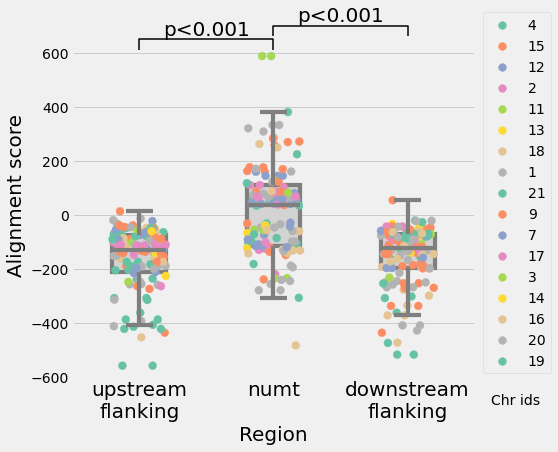

In [292]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,1,figsize=(8,6.5))

np.random.seed(1)
subdf=df.loc[np.random.choice(np.arange(0,len(df)),size=400)]
ax=sns.boxplot(
    x='region',y='Alignment score',data=subdf,
    linewidth=4.2,
    color='lightgrey',
    fliersize=0,
    width=.4,
    zorder=2
)
ax=sns.stripplot(
    x='region',y='Alignment score',data=subdf,
    linewidth=.3,
    size=8,
    hue='chr_id',
    palette="Set2",
    edgecolor=None,
    jitter=.2,
    zorder=1
)
annot_stat('p<0.001',0,1,max(subdf.loc[subdf['region']=='numt']['Alignment score'])-400,40)
annot_stat('p<0.001',2,1,max(subdf.loc[subdf['region']=='numt']['Alignment score'])-350,40)
ax.set_ylim(-600,750)
ax.set_xticklabels(['upstream\nflanking','numt','downstream\nflanking'],fontsize=20)
ax.set_ylabel('Alignment score',fontsize=20)
ax.set_xlabel('Region',fontsize=20)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.text(2.62,-700,'Chr ids')
plt.tight_layout()
plt.savefig('../../results/deep_analysis.png',dpi=300)

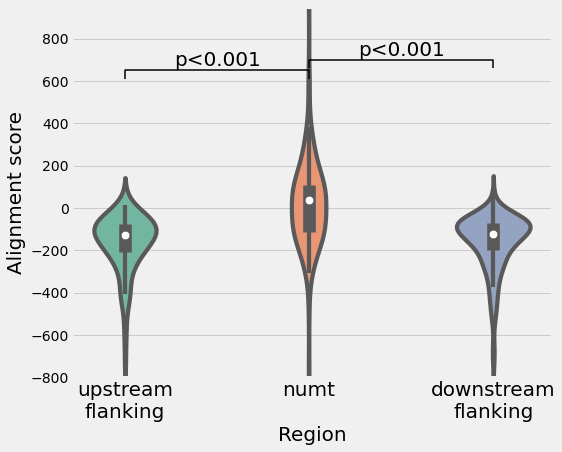

In [11]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,1,figsize=(8,6.5))

np.random.seed(1)
subdf=df.loc[np.random.choice(np.arange(0,len(df)),size=400)]
ax=sns.violinplot(
    x='region',y='Alignment score',data=subdf,
    linewidth=4.2,
    palette='Set2',
    fliersize=0,
    width=.4,
    zorder=2
)
annot_stat('p<0.001',0,1,max(subdf.loc[subdf['region']=='numt']['Alignment score'])-400,40)
annot_stat('p<0.001',2,1,max(subdf.loc[subdf['region']=='numt']['Alignment score'])-350,40)
ax.set_ylim(-800,950)
ax.set_xticklabels(['upstream\nflanking','numt','downstream\nflanking'],fontsize=20)
ax.set_ylabel('Alignment score',fontsize=20)
ax.set_xlabel('Region',fontsize=20)
plt.tight_layout()